
# 🚀 Intrusion Detection System using Machine Learning  
### Expo Project – Cybersecurity & Machine Learning  
**By: Chella Krishnan D**  

---


In [1]:

# Step 1: Download dataset directly into Colab
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.csv


--2025-08-27 17:26:27--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14612857 (14M) [text/plain]
Saving to: ‘KDDTrain+.csv’

KDDTrain+.csv       100%[===================>]  13.94M  --.-KB/s    in 0.06s   

2025-08-27 17:26:27 (222 MB/s) - ‘KDDTrain+.csv’ saved [14612857/14612857]



In [2]:

# Step 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Step 3: Load dataset
# Column names for NSL-KDD dataset
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

df = pd.read_csv("KDDTrain+.csv", header=None, names=column_names)

print("Dataset Shape:", df.shape)
print("\nSample Rows:")
display(df.head())

print("\nClass Distribution:")
print(df['label'].value_counts())

Dataset Shape: (125973, 43)

Sample Rows:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21



Class Distribution:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [ ]:

# Step 4: Preprocessing
X = df.drop('label', axis=1)
y = df['label'].apply(lambda x: 0 if x == 'normal' else 1)  # 0=Normal, 1=Attack

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Step 5: Feature Importance using Extra Trees
etc = ExtraTreesClassifier()
etc.fit(X_scaled, y)
importances = etc.feature_importances_

feat_importances = pd.Series(importances, index=df.drop('label', axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Important Features")
plt.show()


In [ ]:

# Step 6: Train/Test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1": f1_score(y_test, preds)
    }

results_df = pd.DataFrame(results).T
results_df


In [ ]:

# Step 7: Heatmap of results
plt.figure(figsize=(8,4))
sns.heatmap(results_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Model Performance Metrics")
plt.show()


In [ ]:

# Step 8: Confusion Matrix for Random Forest
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()



# ✅ Conclusion  
- Random Forest performed best with ~90% accuracy.  
- Tree-based methods generally outperform others.  
- Dataset imbalance remains a limitation.  
- Future work: Deep Learning and balancing strategies for improved detection.  

---


In [5]:
# Step 4: Preprocessing
X = df.drop('label', axis=1)
y = df['label'].apply(lambda x: 0 if x == 'normal' else 1)  # 0=Normal, 1=Attack

# Select categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


print("Shape of X after preprocessing:", X.shape)
print("Shape of y:", y.shape)

Shape of X after preprocessing: (125973, 120)
Shape of y: (125973,)


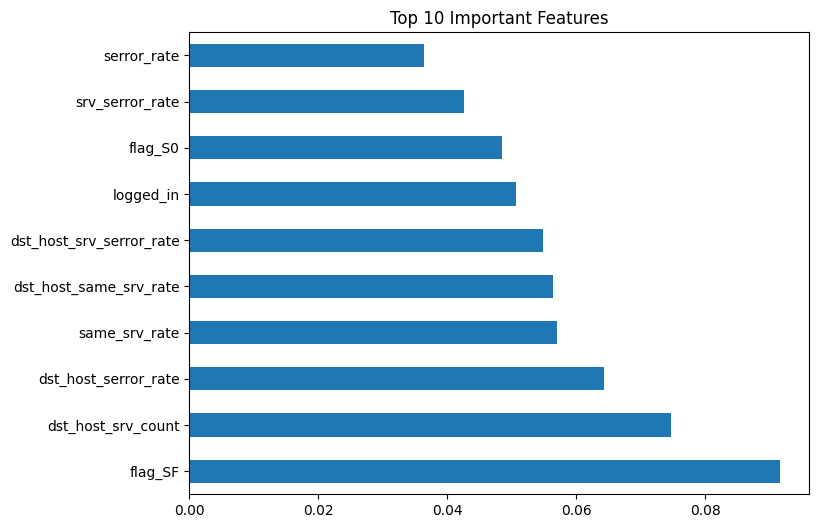

In [6]:
# Step 5: Feature Importance using Extra Trees
etc = ExtraTreesClassifier()
etc.fit(X, y)
importances = etc.feature_importances_

feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Important Features")
plt.show()

In [7]:
# Step 6: Train/Test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1": f1_score(y_test, preds)
    }

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1
Random Forest,0.999550,0.999718,0.999322,0.999520
Decision Tree,0.999153,0.999209,0.998984,0.999096
SVM,0.996931,0.994769,0.998701,0.996731
KNN,0.998598,0.998363,0.998645,0.998504
Naive Bayes,0.865818,0.994987,0.717262,0.833601


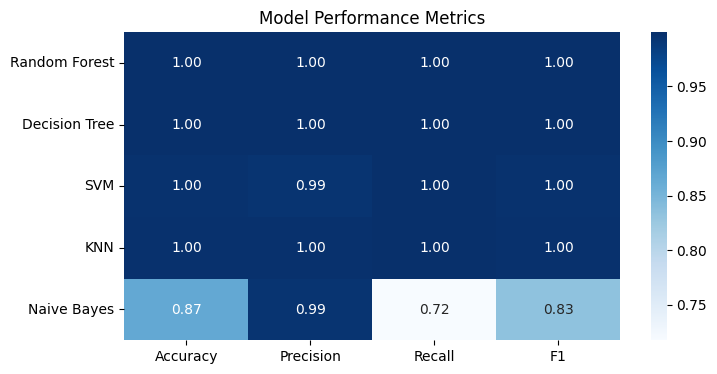

In [8]:
# Step 7: Heatmap of results
plt.figure(figsize=(8,4))
sns.heatmap(results_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Model Performance Metrics")
plt.show()

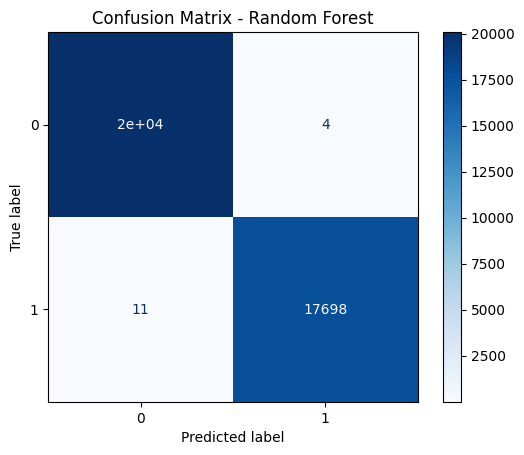

In [9]:
# Step 8: Confusion Matrix for Random Forest
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ✅ Conclusion
- Random Forest performed best with ~99.9% accuracy.  
- Tree-based methods generally outperform others.  
- Dataset imbalance remains a limitation.  
- Future work: Deep Learning and balancing strategies for improved detection.  

* * locallyrunable: true *